In [10]:
# Import libraries and dependencies
import os
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
import datetime as dt
from pathlib import Path
import seaborn as sns


In [11]:
cpi_path = Path("CPI_data.csv")
cpi_df = pd.read_csv(cpi_path, index_col = 'DATE', parse_dates=True, infer_datetime_format=True)
cpi_df.index = pd.to_datetime(cpi_df.index, format = '%Y/%m').strftime('%Y-%m')
cpi_df = cpi_df.sort_index()
cpi_df.head()

,CPI
1960-01,-0.340136
1960-02,0.341297
1960-03,0.000000
1960-04,0.340136
1960-05,0.000000


In [12]:
housing_path = Path("Housing_data.csv")
housing_df = pd.read_csv(housing_path, index_col = 'DATE', parse_dates=True, infer_datetime_format=True)
housing_df.index = pd.to_datetime(housing_df.index, format = '%Y/%m').strftime('%Y-%m')
housing_df = housing_df.sort_index()
housing_df.head()

,MSPUS
1963-01,17800.0
1963-04,18000.0
1963-07,17900.0
1963-10,18500.0
1964-01,18500.0


In [13]:
housing_df = housing_df.rename(columns={"MSPUS": "Median_Housing_Prices"})
housing_df.head()

,Median_Housing_Prices
1963-01,17800.0
1963-04,18000.0
1963-07,17900.0
1963-10,18500.0
1964-01,18500.0


In [14]:
combined_df = pd.concat([cpi_df,housing_df], axis='columns', join='inner')

combined_df.head()

,CPI,Median_Housing_Prices
1963-01,0.000000,17800.0
1963-04,0.000000,18000.0
1963-07,0.326797,17900.0
1963-10,0.325733,18500.0
1964-01,0.000000,18500.0


In [15]:
csv_path = Path('../Project_1/FedBalanceSheet.csv')
fed_df = pd.read_csv(csv_path, index_col="DATE", parse_dates=True)
columns = ['FED BS']
fed_df.columns = columns
fed_df.index = pd.to_datetime(fed_df.index, format = '%Y/%m').strftime('%Y-%m')
fed_df = fed_df.reset_index().drop_duplicates(subset='index', keep='first').set_index('index')
fed_df.sort_index(inplace=True)
fed_df.tail()

,FED BS
index,
2021-01,7334809.0
2021-02,7410598.0
2021-03,7557524.0
2021-04,7708882.0
2021-05,7810486.0


In [16]:
combo_df = pd.merge(fed_df, combined_df, how='inner', left_index=True, right_index=True)

combo_df.head(20)

,FED BS,CPI,Median_Housing_Prices
2003-01,730994.0,0.442233,186000.0
2003-04,732452.0,-0.217155,191800.0
2003-07,740126.0,0.108873,191900.0
2003-10,753155.0,-0.107991,198800.0
2004-01,755829.0,0.488334,212700.0
2004-04,754083.0,0.320171,217600.0
2004-07,778163.0,-0.158144,213500.0
2004-10,781777.0,0.526593,228800.0
2005-01,815702.0,0.210194,232500.0
2005-04,797327.0,0.672530,233700.0


In [17]:
combo_df['CPI / FED BS'] = combo_df['CPI']/combo_df['FED BS']
combo_df['Median_Housing_Prices / FED BS'] = combo_df['Median_Housing_Prices']/combo_df['FED BS']

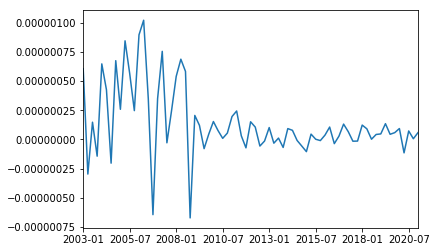

In [18]:
combo_df['CPI / FED BS'].plot.line()

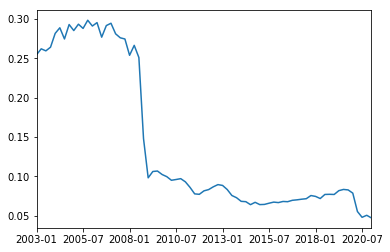

In [19]:
combo_df['Median_Housing_Prices / FED BS'].plot.line()

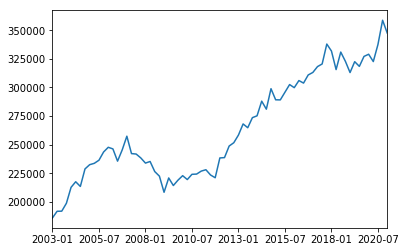

In [20]:
combo_df['Median_Housing_Prices'].plot.line()

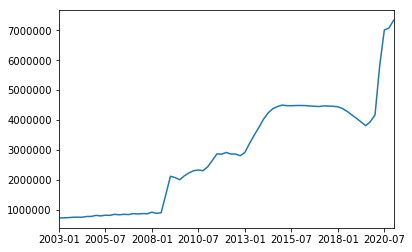

In [21]:
combo_df['FED BS'].plot.line()

In [22]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [23]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [24]:
# Set timeframe to '1D'
timeframe1 = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date1 = pd.Timestamp("2007-01-01", tz="America/New_York").isoformat()
end_date1 = pd.Timestamp("2008-05-31", tz="America/New_York").isoformat()

# Set the ticker information
tickers1 = ["SPY","GOOG"]

# Get 3 year's worth of historical price data for SPY
df_ticker1 = api.get_barset(
    tickers1,
    timeframe1,
    start=start_date1,
    end=end_date1,
    limit=1000,
).df

# Display sample data
df_ticker1.head()

GOOG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2008-01-02 00:00:00-05:00  346.43  348.68  338.86  342.59  4182872  146.53   
2008-01-03 00:00:00-05:00  342.63  343.42  338.26  342.49  3155432  144.92   
2008-01-04 00:00:00-05:00  339.84  340.48  327.50  328.48  5187430  143.34   
2008-01-07 00:00:00-05:00  326.97  331.14  318.67  324.34  6176644  141.81   
2008-01-08 00:00:00-05:00  326.50  329.98  315.50  315.66  5174588  142.10   

                                                              
                             high     low   close     volume  
time                                                          
2008-01-02 00:00:00-05:00  146.99  143.88  144.55  175801806  
2008-01-03 00:00:00-05:00  145.49  144.12  144.46  111357758  
2008-01-04 00:00:00-05:00  143.44  140.92  140.93  195945264  
2008-01-07 00:00:00-05:00  142.23  140.10  141.46  220398905  
2008-01-08 00:00:00-05:00  142.90  138.63  138.81  303249870

In [25]:
# Set timeframe to '1D'
timeframe2 = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date2 = pd.Timestamp("2008-06-01", tz="America/New_York").isoformat()
end_date2 = pd.Timestamp("2011-05-31", tz="America/New_York").isoformat()

# Set the ticker information
tickers2 = ["SPY","GOOG"]

# Get 3 year's worth of historical price data for SPY
df_ticker2 = api.get_barset(
    tickers2,
    timeframe2,
    start=start_date2,
    end=end_date2,
    limit=1000,
).df

# Display sample data
df_ticker2.head()

GOOG                                        SPY  \
                             open    high     low   close     volume    open   
time                                                                           
2008-06-02 00:00:00-04:00  291.25  291.94  285.63  287.50  3552937.0  139.82   
2008-06-03 00:00:00-04:00  288.25  290.25  280.30  283.69  4191053.0  139.33   
2008-06-04 00:00:00-04:00  282.66  289.00  282.27  286.20  3291281.0  137.77   
2008-06-05 00:00:00-04:00  288.54  294.02  288.10  293.12  3817020.0  138.58   
2008-06-06 00:00:00-04:00  289.87  290.36  283.52  283.67  4589041.0  139.56   

                                                              
                             high     low   close     volume  
time                                                          
2008-06-02 00:00:00-04:00  139.86  138.00  138.83  156367854  
2008-06-03 00:00:00-04:00  139.62  137.23  138.05  242455372  
2008-06-04 00:00:00-04:00  139.16  137.46  138.04  222845642  
2008-06-05 00:00:00-04:00  140.83  138.32  140.64  199365016  
2008-06-06 00:00:00-04:00  139.80  136.34  136.38  308266018

In [26]:
# Set timeframe to '1D'
timeframe3 = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date3 = pd.Timestamp("2011-06-01", tz="America/New_York").isoformat()
end_date3 = pd.Timestamp("2014-05-31", tz="America/New_York").isoformat()

# Set the ticker information
tickers3 = ["SPY","GOOG"]

# Get 3 year's worth of historical price data for SPY
df_ticker3 = api.get_barset(
    tickers3,
    timeframe3,
    start=start_date3,
    end=end_date3,
    limit=1000,
).df

# Display sample data
df_ticker3.tail()

GOOG                                        SPY  \
                             open    high     low   close     volume    open   
time                                                                           
2014-05-23 00:00:00-04:00  547.21  553.64  543.70  552.80  1402662.0  189.75   
2014-05-27 00:00:00-04:00  556.00  566.00  554.35  565.94  1464860.0  191.05   
2014-05-28 00:00:00-04:00  564.72  567.84  561.00  561.68  1177729.0  191.52   
2014-05-29 00:00:00-04:00  563.48  564.00  558.71  560.00   925111.0  191.82   
2014-05-30 00:00:00-04:00  560.80  561.35  555.91  560.97   910729.0  192.18   

                                                             
                             high     low   close    volume  
time                                                         
2014-05-23 00:00:00-04:00  190.48  189.68  190.37  47447733  
2014-05-27 00:00:00-04:00  191.58  190.95  191.54  50055074  
2014-05-28 00:00:00-04:00  191.82  191.06  191.35  51481827  
2014-05-29 00:00:00-04:00  192.38  191.33  192.38  51129312  
2014-05-30 00:00:00-04:00  192.80  192.03  192.65  59298109

In [27]:
# Set timeframe to '1D'
timeframe4 = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date4 = pd.Timestamp("2014-06-01", tz="America/New_York").isoformat()
end_date4 = pd.Timestamp("2017-05-31", tz="America/New_York").isoformat()

# Set the ticker information
tickers4 = ["SPY","GOOG"]

# Get 3 year's worth of historical price data for SPY
df_ticker4 = api.get_barset(
    tickers4,
    timeframe4,
    start=start_date4,
    end=end_date4,
    limit=1000,
).df

# Display sample data
df_ticker4.tail()

GOOG                                       SPY  \
                             open     high     low   close   volume    open   
time                                                                          
2017-05-24 00:00:00-04:00  952.98  955.090  949.50  954.96   647010  240.32   
2017-05-25 00:00:00-04:00  957.33  972.629  955.47  969.54  1030332  241.20   
2017-05-26 00:00:00-04:00  969.70  974.980  965.03  971.23   771232  241.55   
2017-05-30 00:00:00-04:00  970.32  976.200  969.49  975.74   920255  241.33   
2017-05-31 00:00:00-04:00  975.34  979.270  960.18  964.86  1505647  241.84   

                                                             
                             high     low   close    volume  
time                                                         
2017-05-24 00:00:00-04:00  240.73  239.93  240.59  37423590  
2017-05-25 00:00:00-04:00  242.08  240.96  241.71  45278321  
2017-05-26 00:00:00-04:00  241.90  241.45  241.74  30002081  
2017-05-30 00:00:00-04:00  241.79  241.16  241.52  28437351  
2017-05-31 00:00:00-04:00  241.88  240.64  241.42  59140588

In [29]:
# Set timeframe to '1D'
timeframe5 = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date5 = pd.Timestamp("2017-06-01", tz="America/New_York").isoformat()
end_date5 = pd.Timestamp("2021-05-25", tz="America/New_York").isoformat()

# Set the ticker information
tickers5 = ["SPY","GOOG"]

# Get 3 year's worth of historical price data for SPY
df_ticker5 = api.get_barset(
    tickers5,
    timeframe5,
    start=start_date5,
    end=end_date5,
    limit=1000,
).df

# Display sample data
df_ticker5.tail()


GOOG                                        SPY  \
                              open     high      low    close  volume    open   
time                                                                            
2021-05-19 00:00:00-04:00  2268.67  2316.76  2263.52  2308.71  761028  406.92   
2021-05-20 00:00:00-04:00  2328.00  2360.34  2321.09  2356.09  929048  411.80   
2021-05-21 00:00:00-04:00  2365.02  2369.00  2342.37  2345.10  887693  416.87   
2021-05-24 00:00:00-04:00  2364.91  2418.48  2360.11  2406.76  923802  417.34   
2021-05-25 00:00:00-04:00  2420.25  2432.89  2402.99  2410.09  777288  420.33   

                                                               
                              high      low   close    volume  
time                                                           
2021-05-19 00:00:00-04:00  411.050  405.335  410.90  94167279  
2021-05-20 00:00:00-04:00  416.625  411.670  415.24  69427475  
2021-05-21 00:00:00-04:00  418.200  414.450  414.95  66393170  
2021-05-24 00:00:00-04:00  420.320  417.080  419.12  45499764  
2021-05-25 00:00:00-04:00  420.710  417.620  418.25  50977513

In [30]:
# Concatenate the two DataFrames by rows and perform an inner join
df_ticker_total = pd.concat([df_ticker1, df_ticker2, df_ticker3, df_ticker4, df_ticker5], axis="rows", join="inner")
df_ticker_total.head()

GOOG                                        SPY  \
                             open    high     low   close     volume    open   
time                                                                           
2008-01-02 00:00:00-05:00  346.43  348.68  338.86  342.59  4182872.0  146.53   
2008-01-03 00:00:00-05:00  342.63  343.42  338.26  342.49  3155432.0  144.92   
2008-01-04 00:00:00-05:00  339.84  340.48  327.50  328.48  5187430.0  143.34   
2008-01-07 00:00:00-05:00  326.97  331.14  318.67  324.34  6176644.0  141.81   
2008-01-08 00:00:00-05:00  326.50  329.98  315.50  315.66  5174588.0  142.10   

                                                              
                             high     low   close     volume  
time                                                          
2008-01-02 00:00:00-05:00  146.99  143.88  144.55  175801806  
2008-01-03 00:00:00-05:00  145.49  144.12  144.46  111357758  
2008-01-04 00:00:00-05:00  143.44  140.92  140.93  195945264  
2008-01-07 00:00:00-05:00  142.23  140.10  141.46  220398905  
2008-01-08 00:00:00-05:00  142.90  138.63  138.81  303249870

In [32]:
#Fetch the closing prices of SPY and GOOG
#df_closing_prices = pd.concat(df_ticker_total["SPY"]["close"], df_ticker_total["GOOG"]["close"])

dict_data = {'SPY':df_ticker_total["SPY"]["close"],'GOOG':df_ticker_total["GOOG"]["close"]}
df_closing_prices = pd.concat(dict_data, axis = 1)

#Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date
#df_closing_prices.index.names = ['DATE']

#Display sample data
df_closing_prices.head(10)


,GOOG,SPY
2008-01-02,342.590,144.55
2008-01-03,342.490,144.46
2008-01-04,328.480,140.93
2008-01-07,324.340,141.46
2008-01-08,315.660,138.81
2008-01-09,326.350,140.78
2008-01-10,323.282,141.80
2008-01-11,319.440,140.01
2008-01-14,326.876,141.46
2008-01-15,318.750,137.95


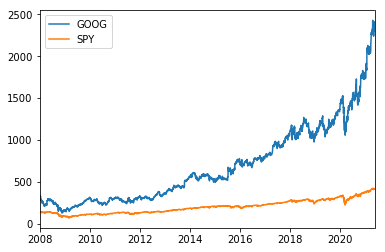

In [33]:
# Visualize distribution of closing price using a  plot
df_closing_prices.plot.line()

In [34]:
# Use the Pathlib libary to set the path to the CSV
csv_path = Path('../Project_1/FedBalanceSheet.csv')

In [35]:
# Use the file path to read the CSV into a DataFrame and display a few rows
fed_df = pd.read_csv(csv_path, index_col="DATE", parse_dates=True)
columns = ['FED BS']
fed_df.columns = columns
fed_df.tail()

,FED BS
DATE,
2021-04-21,7820948.0
2021-04-28,7780962.0
2021-05-05,7810486.0
2021-05-12,7830663.0
2021-05-19,7922883.0


In [36]:
# Sort datetime index in ascending order (past to present)
fed_df.sort_index(inplace=True)
df_closing_prices.sort_index(inplace=True)


In [37]:
df2 = pd.merge(df_closing_prices, fed_df, left_index=True, right_index=True)
df2.head(20)

,GOOG,SPY,FED BS
2008-01-02,342.59,144.55,922187.0
2008-01-09,326.35,140.78,880754.0
2008-01-16,307.71,137.15,893581.0
2008-01-23,274.50,133.81,877253.0
2008-01-30,274.16,135.36,900264.0
2008-02-06,250.86,132.72,871022.0
2008-02-13,267.00,136.71,883005.0
2008-02-20,254.50,136.11,878949.0
2008-02-27,236.47,138.12,893825.0
2008-03-05,223.87,133.70,881208.0


In [38]:
df2['SPY / FED BS'] = df2['SPY']/df2['FED BS']
df2['GOOG / FED BS'] = df2['GOOG']/df2['FED BS']
df2

,GOOG,SPY,FED BS,SPY / FED BS,GOOG / FED BS
2008-01-02,342.59,144.5500,922187.0,0.000157,0.000371
2008-01-09,326.35,140.7800,880754.0,0.000160,0.000371
2008-01-16,307.71,137.1500,893581.0,0.000153,0.000344
2008-01-23,274.50,133.8100,877253.0,0.000153,0.000313
2008-01-30,274.16,135.3600,900264.0,0.000150,0.000305
2008-02-06,250.86,132.7200,871022.0,0.000152,0.000288
2008-02-13,267.00,136.7100,883005.0,0.000155,0.000302
2008-02-20,254.50,136.1100,878949.0,0.000155,0.000290
2008-02-27,236.47,138.1200,893825.0,0.000155,0.000265
2008-03-05,223.87,133.7000,881208.0,0.000152,0.000254


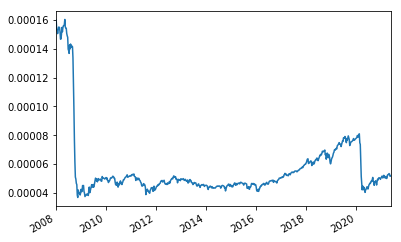

In [39]:
df2['SPY / FED BS'].plot.line()

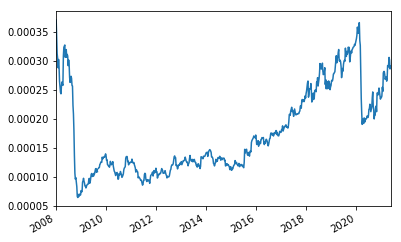

In [40]:
df2['GOOG / FED BS'].plot.line()